我的第一个Kaggle项目，将使用基础的 DNN 模型进行进行数字识别。使用一层 Hidden Layer ，会分别测试 Activation 为 sigmoid 和 tanh 。实现的步骤如下：

 1. 从 csv 读取训练数据和测试数据
 2. 将数据格式化成训练所需数据
 3. 可视化数据
 4. 训练模型
 5. 评估模型

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.


test.csv
train.csv



# 数据处理部分
## 从 csv 读取训练和测试数据

In [2]:
raw_train = pd.read_csv('../input/train.csv')
raw_test = pd.read_csv('../input/test.csv')

In [3]:
raw_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 分析数据
可以看到数据第一列是标签，标记图片内容是数字几。接下来我们将数据原始数据格式化。

## 格式化数据为训练所需

In [4]:

# 将原始数据分为 labels 和 inputs
inputs, labels = raw_train.values[:, 1:], raw_train.values[:, 0:1]

# 测试数据没有标记label
tests = raw_test.values

# 打乱数据，抽取部分数据用作 validation 
import random
all_idx = np.arange(inputs.shape[0])
random.shuffle(all_idx)
train_inputs, train_labels = inputs[all_idx[5000:]], labels[all_idx[5000:]]
valid_inputs, valid_labels = inputs[all_idx[0:5000]],labels[all_idx[0:5000]]

# 对标签进行 one hot 处理
from keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels, num_classes=10)
one_hot_valid_labels = to_categorical(valid_labels, num_classes=10)

Using TensorFlow backend.


## 可视化数据

In [5]:
# 展示数据
import matplotlib.pyplot as plt
def view_sample(index):
    plt.imshow(train_inputs[index].reshape(28,28))
    plt.title(train_labels[index])
    plt.show()

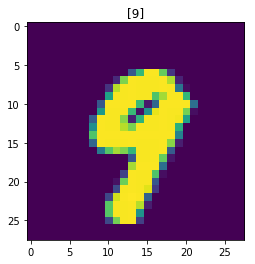

In [6]:
view_sample(10)

# 构造模型

## 导入必须的库

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [8]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(1024, activation='sigmoid', input_dim=784))
model_sigmoid.add(Dense(10, activation='softmax'))
model_sigmoid.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

In [9]:
# 训练数据
model_sigmoid.fit(train_inputs, one_hot_train_labels, epochs=10, batch_size=256)

Epoch 1/10
37000/37000 [==============================] - 6s - loss: 0.4151 - acc: 0.8808     
Epoch 2/10
37000/37000 [==============================] - 7s - loss: 0.2214 - acc: 0.9355     
Epoch 3/10
37000/37000 [==============================] - 7s - loss: 0.1813 - acc: 0.9459     
Epoch 4/10
37000/37000 [==============================] - 7s - loss: 0.1561 - acc: 0.9531     
Epoch 5/10
37000/37000 [==============================] - 6s - loss: 0.1411 - acc: 0.9582     
Epoch 6/10
37000/37000 [==============================] - 6s - loss: 0.1254 - acc: 0.9628     
Epoch 7/10
37000/37000 [==============================] - 6s - loss: 0.1161 - acc: 0.9655     
Epoch 8/10
37000/37000 [==============================] - 6s - loss: 0.1084 - acc: 0.9673     
Epoch 9/10
37000/37000 [==============================] - 7s - loss: 0.1021 - acc: 0.9690     
Epoch 10/10
37000/37000 [==============================] - 7s - loss: 0.0950 - acc: 0.9718     


In [10]:
score = model_sigmoid.evaluate(valid_inputs, one_hot_valid_labels, batch_size=56)
print(score)

4480/5000 [=========================>....] - ETA: 0s[0.11717131949961185, 0.964200007724762]


## 修改 Hidden Layer 的 activation 为tanh

In [11]:
model_tanh = Sequential()
model_tanh.add(Dense(1024, activation='tanh', input_dim=784))
model_tanh.add(Dense(10, activation='softmax'))
model_tanh.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

In [12]:
model_tanh.fit(train_inputs, one_hot_train_labels, epochs=10, batch_size=256)


Epoch 1/10
37000/37000 [==============================] - 7s - loss: 0.4261 - acc: 0.8702     
Epoch 2/10
37000/37000 [==============================] - 7s - loss: 0.2560 - acc: 0.9216     
Epoch 3/10
37000/37000 [==============================] - 7s - loss: 0.2155 - acc: 0.9336     
Epoch 4/10
37000/37000 [==============================] - 7s - loss: 0.1864 - acc: 0.9434     
Epoch 5/10
37000/37000 [==============================] - 7s - loss: 0.1700 - acc: 0.9488     
Epoch 6/10
37000/37000 [==============================] - 7s - loss: 0.1586 - acc: 0.9520     
Epoch 7/10
37000/37000 [==============================] - 7s - loss: 0.1460 - acc: 0.9563     
Epoch 8/10
37000/37000 [==============================] - 7s - loss: 0.1382 - acc: 0.9588     
Epoch 9/10
37000/37000 [==============================] - 6s - loss: 0.1317 - acc: 0.9597     
Epoch 10/10
37000/37000 [==============================] - 6s - loss: 0.1248 - acc: 0.9627     


In [13]:
score = model_tanh.evaluate(valid_inputs, one_hot_valid_labels, batch_size=128)
print(score)

4096/5000 [=======================>......] - ETA: 0s[0.13647822144031524, 0.95720000000000005]


# 提交结果

In [14]:
id = np.arange(1,28001)
pred_classes = model_sigmoid.predict_classes(tests)

submission = pd.DataFrame({
    "ImageId": id,
    "Label": pred_classes})

print(submission[0:10])

submission.to_csv('predictions.csv', index=False)

27424/28000 [============================>.] - ETA: 0s   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3
5        6      7
6        7      0
7        8      3
8        9      0
9       10      3
